In [6]:
import pandas as pd
df = pd.read_csv('인구현황.csv')   # 또는
# df = pd.read_excel('yourfile.xlsx')


In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


### 지역별 총인구수 top5 및 plot

지역별 총인구수 Top5
행정기관
경기도      13694685
서울특별시     9331828
부산광역시     3266598
경상남도      3228380
인천광역시     3021010
Name: 총인구수, dtype: int64


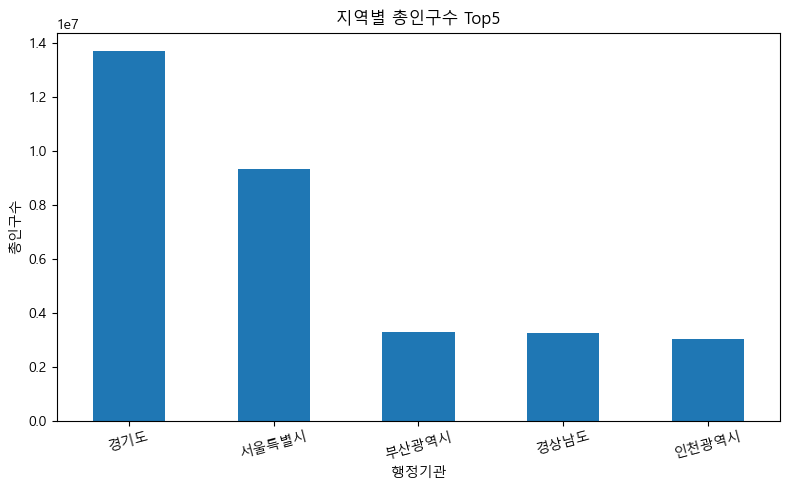

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('인구현황.csv')

# 혹시 모를 공백 제거(습관적으로)
df.columns = df.columns.str.strip()

# 1. 지역별 총인구수 Top5 (전국 제외)
region_pop = df[df['행정기관'] != '전국'].groupby('행정기관')['총인구수'].sum().sort_values(ascending=False)

print("지역별 총인구수 Top5")
print(region_pop.head(5))

# 1-1. plot
plt.figure(figsize=(8,5))
region_pop.head(5).plot(kind='bar')
plt.title('지역별 총인구수 Top5')
plt.xlabel('행정기관')
plt.ylabel('총인구수')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [10]:
print(df.columns)
print(df.head())


Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')
       행정기관코드   행정기관      총인구수       세대수  세대당 인구    남자 인구수    여자 인구수  남여 비율
0  1000000000     전국  51217221  24118928    2.12  25498324  25718897   0.99
1  1100000000  서울특별시   9331828   4482063    2.08   4505355   4826473   0.93
2  2600000000  부산광역시   3266598   1570403    2.08   1589912   1676686   0.95
3  2700000000  대구광역시   2363629   1104130    2.14   1159601   1204028   0.96
4  2800000000  인천광역시   3021010   1373827    2.20   1509243   1511767   1.00


### 세대당 인구수 높은 지역 top5 및 plot

세대당 인구수 높은 지역 Top5
      행정기관  세대당 인구
8  세종특별자치시    2.39
9      경기도    2.26
7    울산광역시    2.22
4    인천광역시    2.20
3    대구광역시    2.14


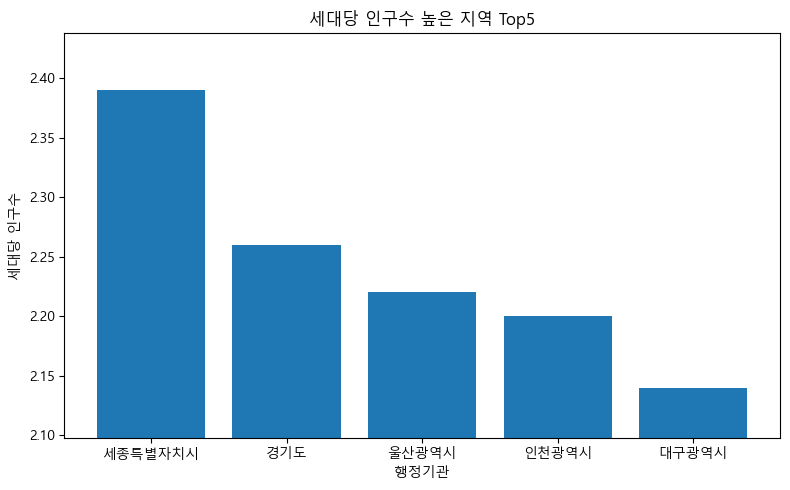

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 읽기 (앞에서 이미 df가 만들어졌다면 이 줄은 생략)
df = pd.read_csv('인구현황.csv')
df.columns = df.columns.str.strip()

# '전국' 행 제거
df_local = df[df['행정기관'] != '전국']

# 세대당 인구 컬럼이 이미 존재함 ('세대당 인구')
# 값이 float로 잘 들어있으니 바로 정렬 후 Top5 추출
top5_hh = df_local.sort_values('세대당 인구', ascending=False).head(5)

print("세대당 인구수 높은 지역 Top5")
print(top5_hh[['행정기관', '세대당 인구']])

# Plot
plt.figure(figsize=(8,5))
plt.bar(top5_hh['행정기관'], top5_hh['세대당 인구'])
plt.title('세대당 인구수 높은 지역 Top5')
plt.xlabel('행정기관')
plt.ylabel('세대당 인구수')
plt.ylim(top5_hh['세대당 인구'].min()*0.98, top5_hh['세대당 인구'].max()*1.02)
plt.tight_layout()
plt.show()


### 남녀 비율 분석 및 기준선 plot

남녀 비율(남자/여자) 상위 5개 지역
     행정기관  남여 비율
7   울산광역시   1.06
12   충청남도   1.05
11   충청북도   1.04
16   경상남도   1.02
15   경상북도   1.02
남녀 비율(남자/여자) 하위 5개 지역
       행정기관  남여 비율
1     서울특별시   0.93
2     부산광역시   0.95
3     대구광역시   0.96
5     광주광역시   0.97
13  전북특별자치도   0.99


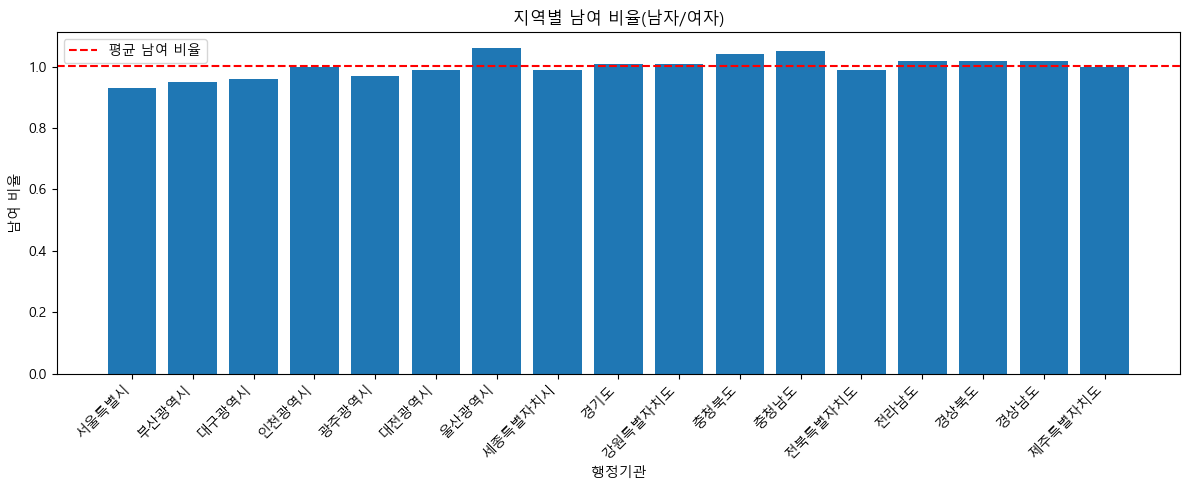

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 이미 df가 있으면 이 줄은 생략
df = pd.read_csv('인구현황.csv')
df.columns = df.columns.str.strip()
df_local = df[df['행정기관'] != '전국']

# 남여 비율 컬럼을 이미 사용 ('남여 비율') - float
print("남녀 비율(남자/여자) 상위 5개 지역")
print(df_local.sort_values('남여 비율', ascending=False)[['행정기관', '남여 비율']].head(5))
print("남녀 비율(남자/여자) 하위 5개 지역")
print(df_local.sort_values('남여 비율', ascending=True)[['행정기관', '남여 비율']].head(5))

# 평균 비율 계산
mean_ratio = df_local['남여 비율'].mean()

# Plot
plt.figure(figsize=(12,5))
plt.bar(df_local['행정기관'], df_local['남여 비율'])
plt.axhline(y=mean_ratio, color='red', linestyle='--', label='평균 남여 비율')
plt.title('지역별 남여 비율(남자/여자)')
plt.xlabel('행정기관')
plt.ylabel('남여 비율')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



### 남자 초과 / 여자 초과 분석

In [22]:
import pandas as pd

# 이미 df가 있으면 생략
df = pd.read_csv('인구현황.csv')
df.columns = df.columns.str.strip()
df_local = df[df['행정기관'] != '전국']

# 남초/여초 컬럼 생성
df_local['남초여초'] = df_local.apply(
    lambda x: '남초' if x['남자 인구수'] > x['여자 인구수'] else '여초',
    axis=1
)

# 결과 확인
print(df_local[['행정기관', '남자 인구수', '여자 인구수', '남초여초']])

# 남초/여초 개수 요약
count_summary = df_local['남초여초'].value_counts()
print("\n남초/여초 지역 수:")
print(count_summary)



       행정기관   남자 인구수   여자 인구수 남초여초
1     서울특별시  4505355  4826473   여초
2     부산광역시  1589912  1676686   여초
3     대구광역시  1159601  1204028   여초
4     인천광역시  1509243  1511767   여초
5     광주광역시   695224   713198   여초
6     대전광역시   717291   721866   여초
7     울산광역시   564888   533161   남초
8   세종특별자치시   194413   196272   여초
9       경기도  6882186  6812499   남초
10  강원특별자치도   763025   754741   남초
11     충청북도   809920   781257   남초
12     충청남도  1096128  1040446   남초
13  전북특별자치도   866030   872660   여초
14     전라남도   902380   886439   남초
15     경상북도  1280547  1250837   남초
16     경상남도  1626926  1601454   남초
17  제주특별자치도   335255   335113   남초

남초/여초 지역 수:
남초여초
남초    9
여초    8
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_9856\3106761873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['남초여초'] = df_local.apply(


### 세대당 인구가 평균보다 높은 지역 및 남초vs여초 countplot 및 지역별 세대수 barplot

세대당 인구가 평균보다 높은 지역:
       행정기관  세대당 인구 남초여초      세대수
3     대구광역시    2.14   여초  1104130
4     인천광역시    2.20   여초  1373827
5     광주광역시    2.14   여초   658075
7     울산광역시    2.22   남초   495378
8   세종특별자치시    2.39   여초   163432
9       경기도    2.26   남초  6058202
17  제주특별자치도    2.13   남초   314862


C:\Users\user\AppData\Local\Temp\ipykernel_9856\1314747310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['남초여초'] = df_local.apply(


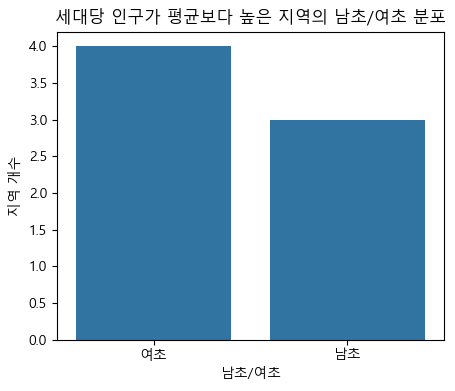

C:\Users\user\AppData\Local\Temp\ipykernel_9856\1314747310.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='행정기관', y='세대수', data=high_hh, palette="pastel")


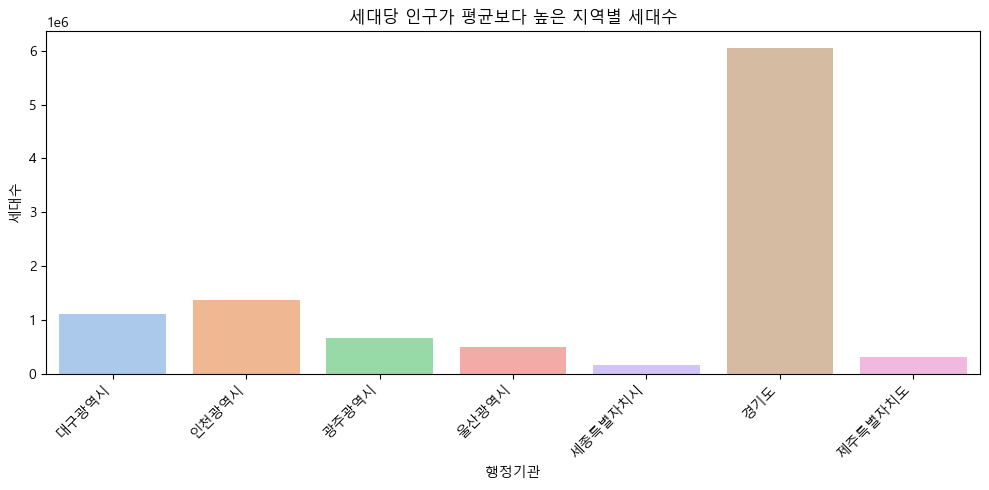

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기 및 전처리
df = pd.read_csv('인구현황.csv')
df.columns = df.columns.str.strip()
df_local = df[df['행정기관'] != '전국']

# 남초/여초 구분 컬럼 생성(이미 앞에서 했다면 생략)
df_local['남초여초'] = df_local.apply(
    lambda x: '남초' if x['남자 인구수'] > x['여자 인구수'] else '여초',
    axis=1
)

# 1. 세대당 인구가 평균보다 높은 지역 필터링
mean_hh = df_local['세대당 인구'].mean()
high_hh = df_local[df_local['세대당 인구'] > mean_hh]

print("세대당 인구가 평균보다 높은 지역:")
print(high_hh[['행정기관', '세대당 인구', '남초여초', '세대수']])

# 2. 남초 vs 여초 countplot (seaborn)
plt.figure(figsize=(5,4))
sns.countplot(x='남초여초', data=high_hh)
plt.title('세대당 인구가 평균보다 높은 지역의 남초/여초 분포')
plt.xlabel('남초/여초')
plt.ylabel('지역 개수')
plt.show()

# 3. 지역별 세대수 barplot (seaborn)
plt.figure(figsize=(10,5))
sns.barplot(x='행정기관', y='세대수', data=high_hh, palette="pastel")
plt.title('세대당 인구가 평균보다 높은 지역별 세대수')
plt.xlabel('행정기관')
plt.ylabel('세대수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 남자 인구 vs 여자 인구 비교 plot

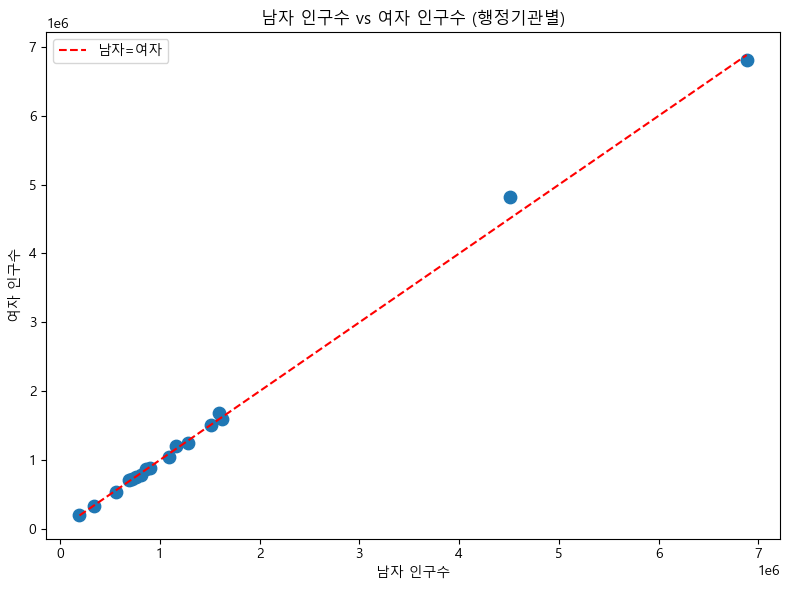

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리
df = pd.read_csv('인구현황.csv')
df.columns = df.columns.str.strip()
df_local = df[df['행정기관'] != '전국']

# 산점도 plot
plt.figure(figsize=(8, 6))
plt.scatter(df_local['남자 인구수'], df_local['여자 인구수'], s=80)

# x=y 기준선(남자=여자)
min_value = min(df_local['남자 인구수'].min(), df_local['여자 인구수'].min())
max_value = max(df_local['남자 인구수'].max(), df_local['여자 인구수'].max())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='남자=여자')

plt.title('남자 인구수 vs 여자 인구수 (행정기관별)')
plt.xlabel('남자 인구수')
plt.ylabel('여자 인구수')
plt.legend()
plt.tight_layout()
plt.show()
